# Plate Number Detection

In [14]:
import cv2

# Load the Haar cascade classifier for Russian plate numbers
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')


image = cv2.imread('car4.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect plate numbers using the classifier
plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw bounding boxes around detected plates 
for (x, y, w, h) in plates:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow('Plate Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plate Number Detection and Extraction

### Install required library by following the steps below:

Step 1:
!pip install easyocr

Step 2:
!pip uninstall opencv-python-headless -y

Step 3:
!pip install opencv-python

In [21]:
import easyocr

plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

image = cv2.imread('car4.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in plates:
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow('Plate Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])
# reader = easyocr.Reader(['en'], gpu=False)  # Set gpu=False if you don't have GPU

# Perform OCR on the image
results = reader.readtext(gray, detail=0)[-1]

print(f"Detected Plate Number: {results}")

Detected Plate Number: M02Zr0


In [ ]:
# Downloading recognition model, please wait. This may take several minutes depending upon your network connection.

# QR Code Generation and Display

### Install required library using the command below:

!pip install qrcode

In [23]:
import qrcode
import numpy as np

In [45]:
# Generate a QR code
qr = qrcode.QRCode(version=1,
                   box_size=10, 
                   border=4)
qr.add_data(results)
# qr.add_data("www.hackmenow.hack")
qr.make(fit=True)

In [46]:
# Create an image from the QR Code instance
qr_img = qr.make_image(fill_color="black", back_color="white")
# qr_img = qr.make_image(fill_color="blue", back_color="yellow")


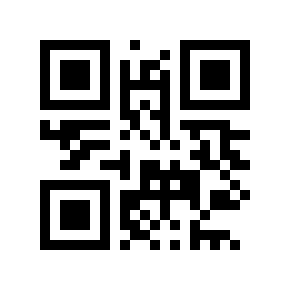

In [47]:
qr_img

In [48]:
type(qr_img)

qrcode.image.pil.PilImage

In [49]:
# Convert the image to a format that OpenCV can display
qr_img = np.array(qr_img.convert('RGB'))

In [50]:
# Convert the RGB image to BGR format for OpenCV
qr_img = cv2.cvtColor(qr_img, cv2.COLOR_RGB2BGR)


In [ ]:
# Save the QR Code 
cv2.imwrite(f'{results}.png', qr_img)

In [51]:

# Display the QR Code 
cv2.imshow('QR Code', qr_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

True

# QR Code Decoding and Verification

In [52]:
# Initialize QR code detector
qr_detector = cv2.QRCodeDetector()
image = cv2.imread(f'{results}.png')

In [57]:
# Detect and decode QR code
data, bbox, _ = qr_detector.detectAndDecode(image)
print(data)

M02Zr0


In [58]:
if data == results:
    cv2.putText(image, f"Car Plate Number Authorized: ", (5, 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 200, 0), 1)
    cv2.putText(image, data, (5, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 1)
    
cv2.imshow('QR Code Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()